In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
# Import necessary libraries


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [4]:

# Load the California housing dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(X.head())
print("\nTarget variable (prices):")
print(y.head())


First five rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target variable (prices):
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [5]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("First five rows of standardized training data:")
print(X_train[:5])


Training set size: 16512, Testing set size: 4128
First five rows of standardized training data:
[[-0.326196    0.34849025 -0.17491646 -0.20836543  0.76827628  0.05137609
  -1.3728112   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 -0.12853018 -0.09890135 -0.11736222
  -0.87669601  0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 -0.25753771 -0.44981806 -0.03227969
  -0.46014647 -0.44760309]
 [-1.01786438  0.58654547 -0.60001532 -0.14515634 -0.00743434  0.07750687
  -1.38217186  1.23269811]
 [-0.17148831  1.14200767  0.3490073   0.08662432 -0.48587717 -0.06883176
   0.5320839  -0.10855122]]


In [6]:

# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer (price)


C:\Users\suppa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [8]:

# Train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.7421 - mean_absolute_error: 0.9166 - val_loss: 0.4873 - val_mean_absolute_error: 0.5033
Epoch 2/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4346 - mean_absolute_error: 0.4704 - val_loss: 0.4257 - val_mean_absolute_error: 0.4697
Epoch 3/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3990 - mean_absolute_error: 0.4478 - val_loss: 0.4030 - val_mean_absolute_error: 0.4463
Epoch 4/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3715 - mean_absolute_error: 0.4311 - val_loss: 0.3808 - val_mean_absolute_error: 0.4328
Epoch 5/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3551 - mean_absolute_error: 0.4208 - val_loss: 0.3689 - val_mean_absolute_error: 0.4235
Epoch 6/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3487 - mean_absolute_error: 0.4145 - val_loss: 0.3464 - val_mean_absolute_error: 0.4107
Epoch 7/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3255 - mean_absolute_error: 0.4

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2593 - mean_absolute_error: 0.3473

Test Mean Absolute Error: 0.35


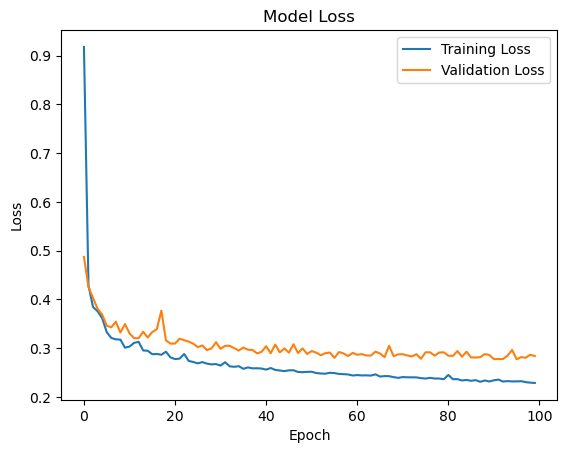

In [9]:

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest Mean Absolute Error: {test_mae:.2f}")

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
